# Stacked Bar Plots for ASV data:

**Updated on:** 2023-03-07 18:06 CET

In this Jupyter Notebook we use the ASV tables (16S, 18SV9) obtained for CCE data to get stacked bar plot in different taxonomic level.

**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
**Input file format**: .csv files <br>
**Outputs**: .csv files, .svg images  <br>
**Dependencies**: tidyverse, dplyr

---

# 1. Setting working directory and loading libraries:

In [ ]:
if (!require("dplyr")) install.packages("dplyr")
if (!require("tidyverse")) install.packages("tidyverse")

In [219]:
#loading libraries
library(dplyr)
library(tidyverse)

In [2]:
setwd("D:/Projects/CCE_Data-Analysis-main/Abzer_ASV_Sunburst") #setting working directory

In [3]:
list.files(".") #lists all the files in the folder

[1] "ASV_16S_Depth_0_15_With_Metadata.csv" 
 [2] "ASV_16S_Depth_15_70_With_Metadata.csv"
 [3] "ASV_16S_With_Metadata.csv"            
 [4] "ASV16S_namedCCE.csv"                  
 [5] "Asv16s_phylum.R"                      
 [6] "ASV16S_Sunbursts.R"                   
 [7] "Class level"                          
 [8] "class_depth_15-70_colors.svg"         
 [9] "Domain level"                         
[10] "metadata_CCE.csv"                     
[11] "Phylum level"                         
[12] "Sunburst_Cycle_1_day1.html"           
[13] "Sunburst_Cycle_1_day1.png"            
[14] "Sunburst_Cycle_2_day1.html"           
[15] "Sunburst_Cycle_2_day1.png"

# 2. Load input files

In [180]:
ft <- read.csv("ASV_16S_With_Metadata.csv",check.names = F,header = T,row.names = 1)

**NOTE: Repeat the notebook with ASV_18S file for getting the corresponding plots.**

In [181]:
head(ft)
dim(ft)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Class16S,Confidence,Domain16S,Family16S,Genus16S,Order16S,Phylum16S,Species16S
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,0,...,0,0,Deltaproteobacteria,0.8284995,Bacteria,NA,NA,SAR324 clade(Marine group B),Proteobacteria,NA
00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,0,...,0,0,Gammaproteobacteria,1.0000000,Bacteria,NA,NA,NA,Proteobacteria,NA
0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,0,...,0,0,Ignavibacteria,0.7360358,Bacteria,uncultured organism,uncultured organism,OPB56,Bacteroidetes,uncultured organism
00256e2eb0d211a7498c3e8b3170cedd,0,0,0,0,0,0,7,0,0,0,...,0,0,NA,0.9999943,Bacteria,NA,NA,NA,Marinimicrobia (SAR406 clade),NA
002ae12276a5da377dd6f7d5452a388a,0,0,0,0,0,0,10,0,0,0,...,0,0,Bacteroidia,0.9964438,Bacteria,NS9 marine group,NA,Flavobacteriales,Bacteroidetes,NA
002c14075180e4484913e02e02dead50,0,0,0,0,0,0,0,0,0,0,...,0,0,Bacteroidia,0.9999990,Bacteria,Crocinitomicaceae,Crocinitomix,Flavobacteriales,Bacteroidetes,uncultured Bacteroidetes/Chlorobi group bacterium


[1] 7538   79

In [182]:
tail(ft) #shows the last 6 rows.

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Class16S,Confidence,Domain16S,Family16S,Genus16S,Order16S,Phylum16S,Species16S
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ffef24b37b1b776cb28ad016e7de42e5,0,0,0,0,0,0,0,0,0,0,...,0,0,Alphaproteobacteria,0.9996935,Bacteria,Midichloriaceae,MD3-55,Rickettsiales,Proteobacteria,NA
fff6021aa804b067a34d2232b24543b9,0,0,0,0,0,0,0,0,0,0,...,0,0,Gammaproteobacteria,0.9364308,Bacteria,NA,NA,KI89A clade,Proteobacteria,NA
ATTRIBUTE_Filament_Possition,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,...,Cycle_2,Cycle_2,NA,NA,NA,NA,NA,NA,NA,NA
ATTRIBUTE_Depth,100,70,38,24,15,0,100,70,44,22,...,12,0,NA,NA,NA,NA,NA,NA,NA,NA
ATTRIBUTE_Depth_Range,70-150,70-150,40-60,0-30,0-30,0-30,70-150,70-150,40-60,0-30,...,0-30,0-30,NA,NA,NA,NA,NA,NA,NA,NA
ATTRIBUTE_Location,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day4,Cycle_2_day4,Cycle_2_day4,Cycle_2_day4,...,Cycle_2_day2,Cycle_2_day2,NA,NA,NA,NA,NA,NA,NA,NA


The last 4 rows are the metadata information

<font color="red"> Change 16S to 18S for when using 18S table: </font>

In [183]:
#remove the 16S extension from the column names
colnames(ft) <- gsub('16S','',colnames(ft))
head(ft,3)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Class,Confidence,Domain,Family,Genus,Order,Phylum,Species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,0,...,0,0,Deltaproteobacteria,0.8284995,Bacteria,NA,NA,SAR324 clade(Marine group B),Proteobacteria,NA
00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,0,...,0,0,Gammaproteobacteria,1.0000000,Bacteria,NA,NA,NA,Proteobacteria,NA
0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,0,...,0,0,Ignavibacteria,0.7360358,Bacteria,uncultured organism,uncultured organism,OPB56,Bacteroidetes,uncultured organism


Filter asv_16s according to depth range 0-20 m:

In [184]:
ft_t <- data.frame(t(ft))
head(ft_t,3)
tail(ft_t,3)

ft_t$ATTRIBUTE_Depth <- as.numeric(ft_t$ATTRIBUTE_Depth) # converting ATTRIBUTE Depth to numeric type

,X00208b62ef66aa36e069777b853c8f17,X00232f374cfc930f3fffbaef0d0c6d80,X0023a8c071538909ed3386e4e1d52278,X00256e2eb0d211a7498c3e8b3170cedd,X002ae12276a5da377dd6f7d5452a388a,X002c14075180e4484913e02e02dead50,X0037dde1e3445df605c9a00529c7d179,X005cdee26e47c8b59e77d9959e57ea07,X005e0e382cf794c32e587e2c38e99afa,X006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCE_P1706_100.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,38,0,0,0,Cycle_2,100,70-150,Cycle_2_day3
CCE_P1706_102.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,83,5,0,0,0,Cycle_2,70,70-150,Cycle_2_day3
CCE_P1706_104.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,0,Cycle_2,38,40-60,Cycle_2_day3


,X00208b62ef66aa36e069777b853c8f17,X00232f374cfc930f3fffbaef0d0c6d80,X0023a8c071538909ed3386e4e1d52278,X00256e2eb0d211a7498c3e8b3170cedd,X002ae12276a5da377dd6f7d5452a388a,X002c14075180e4484913e02e02dead50,X0037dde1e3445df605c9a00529c7d179,X005cdee26e47c8b59e77d9959e57ea07,X005e0e382cf794c32e587e2c38e99afa,X006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Order,SAR324 clade(Marine group B),NA,OPB56,NA,Flavobacteriales,Flavobacteriales,Chromatiales,Flavobacteriales,NA,NA,...,Thalassobaculales,Myxococcales,Parvibaculales,SAR86 clade,Rickettsiales,KI89A clade,NA,NA,NA,NA
Phylum,Proteobacteria,Proteobacteria,Bacteroidetes,Marinimicrobia (SAR406 clade),Bacteroidetes,Bacteroidetes,Proteobacteria,Bacteroidetes,Proteobacteria,Proteobacteria,...,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,NA,NA,NA,NA
Species,NA,NA,uncultured organism,NA,NA,uncultured Bacteroidetes/Chlorobi group bacterium,uncultured bacterium,uncultured marine bacterium,NA,NA,...,NA,uncultured marine bacterium,uncultured PS1 clade bacterium,NA,NA,NA,NA,NA,NA,NA


In [185]:
ft_surface <- ft_t %>% filter(ATTRIBUTE_Depth <= 20)

In [186]:
head(ft_surface,3) #first 6 rows
tail(ft_surface,3) #last 6 rows

,X00208b62ef66aa36e069777b853c8f17,X00232f374cfc930f3fffbaef0d0c6d80,X0023a8c071538909ed3386e4e1d52278,X00256e2eb0d211a7498c3e8b3170cedd,X002ae12276a5da377dd6f7d5452a388a,X002c14075180e4484913e02e02dead50,X0037dde1e3445df605c9a00529c7d179,X005cdee26e47c8b59e77d9959e57ea07,X005e0e382cf794c32e587e2c38e99afa,X006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
CCE_P1706_108.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,0,Cycle_2,15,0-30,Cycle_2_day3
CCE_P1706_110.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,93,0,0,0,Cycle_2,0,0-30,Cycle_2_day3
CCE_P1706_120.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,80,0,0,0,Cycle_2,15,0-30,Cycle_2_day4


,X00208b62ef66aa36e069777b853c8f17,X00232f374cfc930f3fffbaef0d0c6d80,X0023a8c071538909ed3386e4e1d52278,X00256e2eb0d211a7498c3e8b3170cedd,X002ae12276a5da377dd6f7d5452a388a,X002c14075180e4484913e02e02dead50,X0037dde1e3445df605c9a00529c7d179,X005cdee26e47c8b59e77d9959e57ea07,X005e0e382cf794c32e587e2c38e99afa,X006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
CCE_P1706_94.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,9,0,0,0,Cycle_2,20,0-30,Cycle_2_day2
CCE_P1706_96.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,39,0,0,0,Cycle_2,12,0-30,Cycle_2_day2
CCE_P1706_98.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,47,0,0,0,Cycle_2,0,0-30,Cycle_2_day2


In [187]:
dim(ft_surface)

[1]   28 7538

Only 28 samples belong to the depth range (0-20m). 'ft_surface' has 7538 columns. Here, except the last 4 metadata columns, all columns gives the count info.

In [188]:
ft_deep <- ft_t %>% filter(ATTRIBUTE_Depth > 20,
                           ATTRIBUTE_Depth <= 100)

In [189]:
sort(unique(ft_deep$ATTRIBUTE_Depth)) #getting all depth values in ft_deep as a sanity check

[1]  21  22  24  25  30  38  40  44  45  50  51  60  70  75  90 100

Then we need to get the names of all Cycles. After that, we subset the taxonomic information from the ft table.

In [190]:
Loc_levels <- levels(as.factor(ft_t$ATTRIBUTE_Location))  #getting all the cycle names
length(Loc_levels) #should return 12 as we have 12 cycle levels
Loc_levels

[1] 12

[1] "Cycle_1_day1" "Cycle_1_day2" "Cycle_1_day3" "Cycle_2_day1" "Cycle_2_day2"
 [6] "Cycle_2_day3" "Cycle_2_day4" "Cycle_3_day1" "Cycle_3_day2" "Cycle_3_day3"
[11] "Cycle_4_day1" "Cycle_4_day2"

In [231]:
# Getting the extra taxonomic info
Extra_rows <- rownames(ft_t)[-grep(pattern='CCE',rownames(ft_t))] # Getting only the rownames without'CCE' in their names
ft_info <- ft_t[Extra_rows,] #subsetting the rows with 'Extra_rows' rownames
ft_info <- ft_info[,1:(ncol(ft_t)-4)] #again excluding the last 4 metadata ATTRIBUTE columns
ft_info

,X00208b62ef66aa36e069777b853c8f17,X00232f374cfc930f3fffbaef0d0c6d80,X0023a8c071538909ed3386e4e1d52278,X00256e2eb0d211a7498c3e8b3170cedd,X002ae12276a5da377dd6f7d5452a388a,X002c14075180e4484913e02e02dead50,X0037dde1e3445df605c9a00529c7d179,X005cdee26e47c8b59e77d9959e57ea07,X005e0e382cf794c32e587e2c38e99afa,X006d426394f0d27aba26711be03dc7f5,...,ffc99b0e1b1d7ec9541d9bb172f461ea,ffcfd47e25ea2051dbb23b68f9a03b24,ffd2a5398b844287a2d241e5e86b953b,ffdc21f4e2240d36c3500987b483cfc3,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Class,Deltaproteobacteria,Gammaproteobacteria,Ignavibacteria,NA,Bacteroidia,Bacteroidia,Gammaproteobacteria,Bacteroidia,Alphaproteobacteria,Gammaproteobacteria,...,NA,Bacteroidia,Bacteroidia,Deltaproteobacteria,Alphaproteobacteria,Deltaproteobacteria,Alphaproteobacteria,Gammaproteobacteria,Alphaproteobacteria,Gammaproteobacteria
Confidence,0.8284995,1.0000000,0.7360358,0.9999943,0.9964438,0.9999990,0.9389294,0.9156532,0.9992681,0.9939051,...,0.9575367,0.9995586,0.7005198,0.7722847,0.9977208,0.9917293,0.9983416,0.9997058,0.9996935,0.9364308
Domain,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,...,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
Family,NA,NA,uncultured organism,NA,NS9 marine group,Crocinitomicaceae,Sedimenticolaceae,NS9 marine group,NA,NA,...,NA,Flavobacteriaceae,Cryomorphaceae,Bdellovibrionaceae,Nisaeaceae,P3OB-42,PS1 clade,NA,Midichloriaceae,NA
Genus,NA,NA,uncultured organism,NA,NA,Crocinitomix,uncultured,uncultured marine bacterium,NA,NA,...,NA,NS4 marine group,uncultured,OM27 clade,OM75 clade,uncultured marine bacterium,uncultured PS1 clade bacterium,NA,MD3-55,NA
Order,SAR324 clade(Marine group B),NA,OPB56,NA,Flavobacteriales,Flavobacteriales,Chromatiales,Flavobacteriales,NA,NA,...,NA,Flavobacteriales,Flavobacteriales,Bdellovibrionales,Thalassobaculales,Myxococcales,Parvibaculales,SAR86 clade,Rickettsiales,KI89A clade
Phylum,Proteobacteria,Proteobacteria,Bacteroidetes,Marinimicrobia (SAR406 clade),Bacteroidetes,Bacteroidetes,Proteobacteria,Bacteroidetes,Proteobacteria,Proteobacteria,...,Proteobacteria,Bacteroidetes,Bacteroidetes,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria
Species,NA,NA,uncultured organism,NA,NA,uncultured Bacteroidetes/Chlorobi group bacterium,uncultured bacterium,uncultured marine bacterium,NA,NA,...,NA,NA,unidentified marine eubacterium,uncultured marine bacterium,NA,uncultured marine bacterium,uncultured PS1 clade bacterium,NA,NA,NA


In [232]:
ft_full <- ft_t[grep(pattern='CCE',rownames(ft_t)),] #ft_full with all depth range

In [233]:
dim(ft_full)
dim(ft_surface)
dim(ft_deep)

[1]   71 7538

[1]   28 7538

[1]   40 7538

In [251]:
rownames(ft_info)

[1] "Class"      "Confidence" "Domain"     "Family"     "Genus"     
[6] "Order"      "Phylum"     "Species"

<font color="red">Change the name of the interested taxonomic level in the cell below to get stacked plot for that level: </font>

In [252]:
new_ft_info <- ft_info
rownames(new_ft_info) <- gsub("Phylum", "InterestedTaxon", rownames(ft_info))
rownames(new_ft_info)

[1] "Class"           "Confidence"      "Domain"          "Family"         
[5] "Genus"           "Order"           "InterestedTaxon" "Species"

# 3. Calculate the relative percentage of all the groups in a taxonomic level according to different cycles

In [253]:
my_ft <- list(ft_full,ft_surface,ft_deep) #create a list with all dataframes

Get the stacked plot info for all the 3 dataframes by running the for loop below:

In [254]:
SP <- list()
for (n in 1:length(my_ft)){
    
    df <- my_ft[[n]] # taking it as our interested dataframe 'df'
    
    Stacked_plot <-c() #initialize
    
    for (i in 1:length(Loc_levels)){
        
        #getting the location-centric averages of feature
        x <- df %>% filter(ATTRIBUTE_Location == Loc_levels[i]) #subsetting files from one cycle level
        x <- as.data.frame(x[,1:(ncol(x)-4)]) #excluding the last 4 metadata columns
        x[,1:ncol(x)] <- lapply(x[,1:ncol(x)],as.numeric) #converting all the count info columns to 'numeric' type
        #print(ncol(x))
        
        #combining the average with the original data
        Avg <- colMeans(x) #getting the column means as "Avg". Here each column is a feature or species
        x <- data.frame(t(rbind(x,Avg,new_ft_info))) #combining the original subsetted data with its average and metadata
        colnames(x)[ncol(x)-nrow(new_ft_info)] <- 'Avg' #usually the average column does not have a column, hence naming it as "Avg"
        x[,1:(ncol(x)-nrow(new_ft_info))] <- lapply(x[,1:(ncol(x)-nrow(new_ft_info))],as.numeric) #again making sure all count columns are numeric type
        #head(x)

        ## Each group (phylum or class etc.) contribution
        Agg_grp <- x
        NA_level <- 0
        
        Aggregates_Level<- aggregate(Agg_grp$Avg, #Variable to be grouped
                             by=list(Agg_grp$InterestedTaxon), #grouping element
                             FUN=sum) #provides the sum of all Avg
    
        colnames(Aggregates_Level) <- c("Group_name","Group_sum") #giving the column names
        Aggregates_Level$Group_sum <-as.double(Aggregates_Level$Group_sum)
        
        NA_level <- sum(Agg_grp$Avg)-sum(Aggregates_Level$Group_sum) #calculate the amount of NA values
        Aggregates_Level<- rbind(c("NA_values",NA_level),Aggregates_Level) #combine the NA contribution info
        Aggregates_Level$Group_sum <-as.double(Aggregates_Level$Group_sum)
        
        #calculate the Percent contribution
        Percent <- c()
        for(j in 1:length(Aggregates_Level$Group_sum)){
            per <- round((Aggregates_Level$Group_sum[j]/sum(Aggregates_Level$Group_sum))*100,3)
            Percent <- c(Percent,per)
        }
        
        Aggregates_Level$Percent <- Percent #including the percent contribution to Aggregates Level dataframe
        Aggregates_Level$Condition <- Loc_levels[i]
        
        Stacked_plot <- rbind(Stacked_plot,Aggregates_Level)
        
        Agg_grp <- Agg_grp %>% filter(InterestedTaxon != "NA") #removing NA InterestedTaxon levels from Agg_grp dataframe
        Agg_grp$InterestedTaxon <- as.factor(Agg_grp$InterestedTaxon)
    }
    
    SP[[n]] <- Stacked_plot
}

[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534
[1] 7534


In [255]:
StackPlot_full <-SP[[1]]
StackPlot_surface <- SP[[2]]
StackPlot_deep <- SP[[3]]

NOTE: In the for loop above, the aggregate function is used to get the sum of all 'Avg' (Agg_grp$Avg) values. The resulting dataframe will have each phylum with sum of Avg. There are also other functions. FUN=mean gives the mean of that particular phylum; FUN=length will give the count of features for the particular phylum (eg: Acidobacteria = 52 feaures or species)

In [256]:
head(StackPlot_full)
dim(StackPlot_full)

,Group_name,Group_sum,Percent,Condition
,<chr>,<dbl>,<dbl>,<chr>
1,NA_values,8.8333333,0.029,Cycle_1_day1
2,Acidobacteria,6.8333333,0.023,Cycle_1_day1
3,Actinobacteria,921.5000000,3.055,Cycle_1_day1
4,Altiarchaeota,0.0000000,0.000,Cycle_1_day1
5,AncK6,0.8333333,0.003,Cycle_1_day1
6,Bacteroidetes,1692.1666667,5.609,Cycle_1_day1


[1] 588   4

In [257]:
head(StackPlot_surface)
dim(StackPlot_surface)

,Group_name,Group_sum,Percent,Condition
,<chr>,<dbl>,<dbl>,<chr>
1,NA_values,5.5,0.069,Cycle_1_day1
2,Acidobacteria,0.0,0.000,Cycle_1_day1
3,Actinobacteria,15.5,0.194,Cycle_1_day1
4,Altiarchaeota,0.0,0.000,Cycle_1_day1
5,AncK6,0.0,0.000,Cycle_1_day1
6,Bacteroidetes,1371.5,17.131,Cycle_1_day1


[1] 588   4

In [258]:
head(StackPlot_deep)
dim(StackPlot_deep)

,Group_name,Group_sum,Percent,Condition
,<chr>,<dbl>,<dbl>,<chr>
1,NA_values,10.50,0.025,Cycle_1_day1
2,Acidobacteria,10.25,0.025,Cycle_1_day1
3,Actinobacteria,1374.50,3.332,Cycle_1_day1
4,Altiarchaeota,0.00,0.000,Cycle_1_day1
5,AncK6,1.25,0.003,Cycle_1_day1
6,Bacteroidetes,1852.50,4.491,Cycle_1_day1


[1] 588   4

Here, percent column gives the relative percentage, i.e, sum of all Percent values equals to 100.

Change the names according to the taxonomic level as well as the ASV file:

In [ ]:
write.csv(StackPlot_full,'StackedPlot_Phylum16_Percent_fulldepth.csv')
write.csv(StackPlot_surface,'StackedPlot_Phylum16_Percent_surface_0-20m.csv')
write.csv(StackPlot_deep,'StackedPlot_Phylum16_Percent_deep_20-100m.csv')

<font color="red"> Change the parameters in the cell below whenever you want to change the height and width of the output plot:</font>

In [268]:
options(repr.plot.width=20, repr.plot.height=20,res=600) # the parameters: width, height & resolution can be changed

# 4. Stacked Bar Plots of ASV for different depth ranges

In [260]:
Stacked_plot <- StackPlot_full

This is how the normal lot will look like:

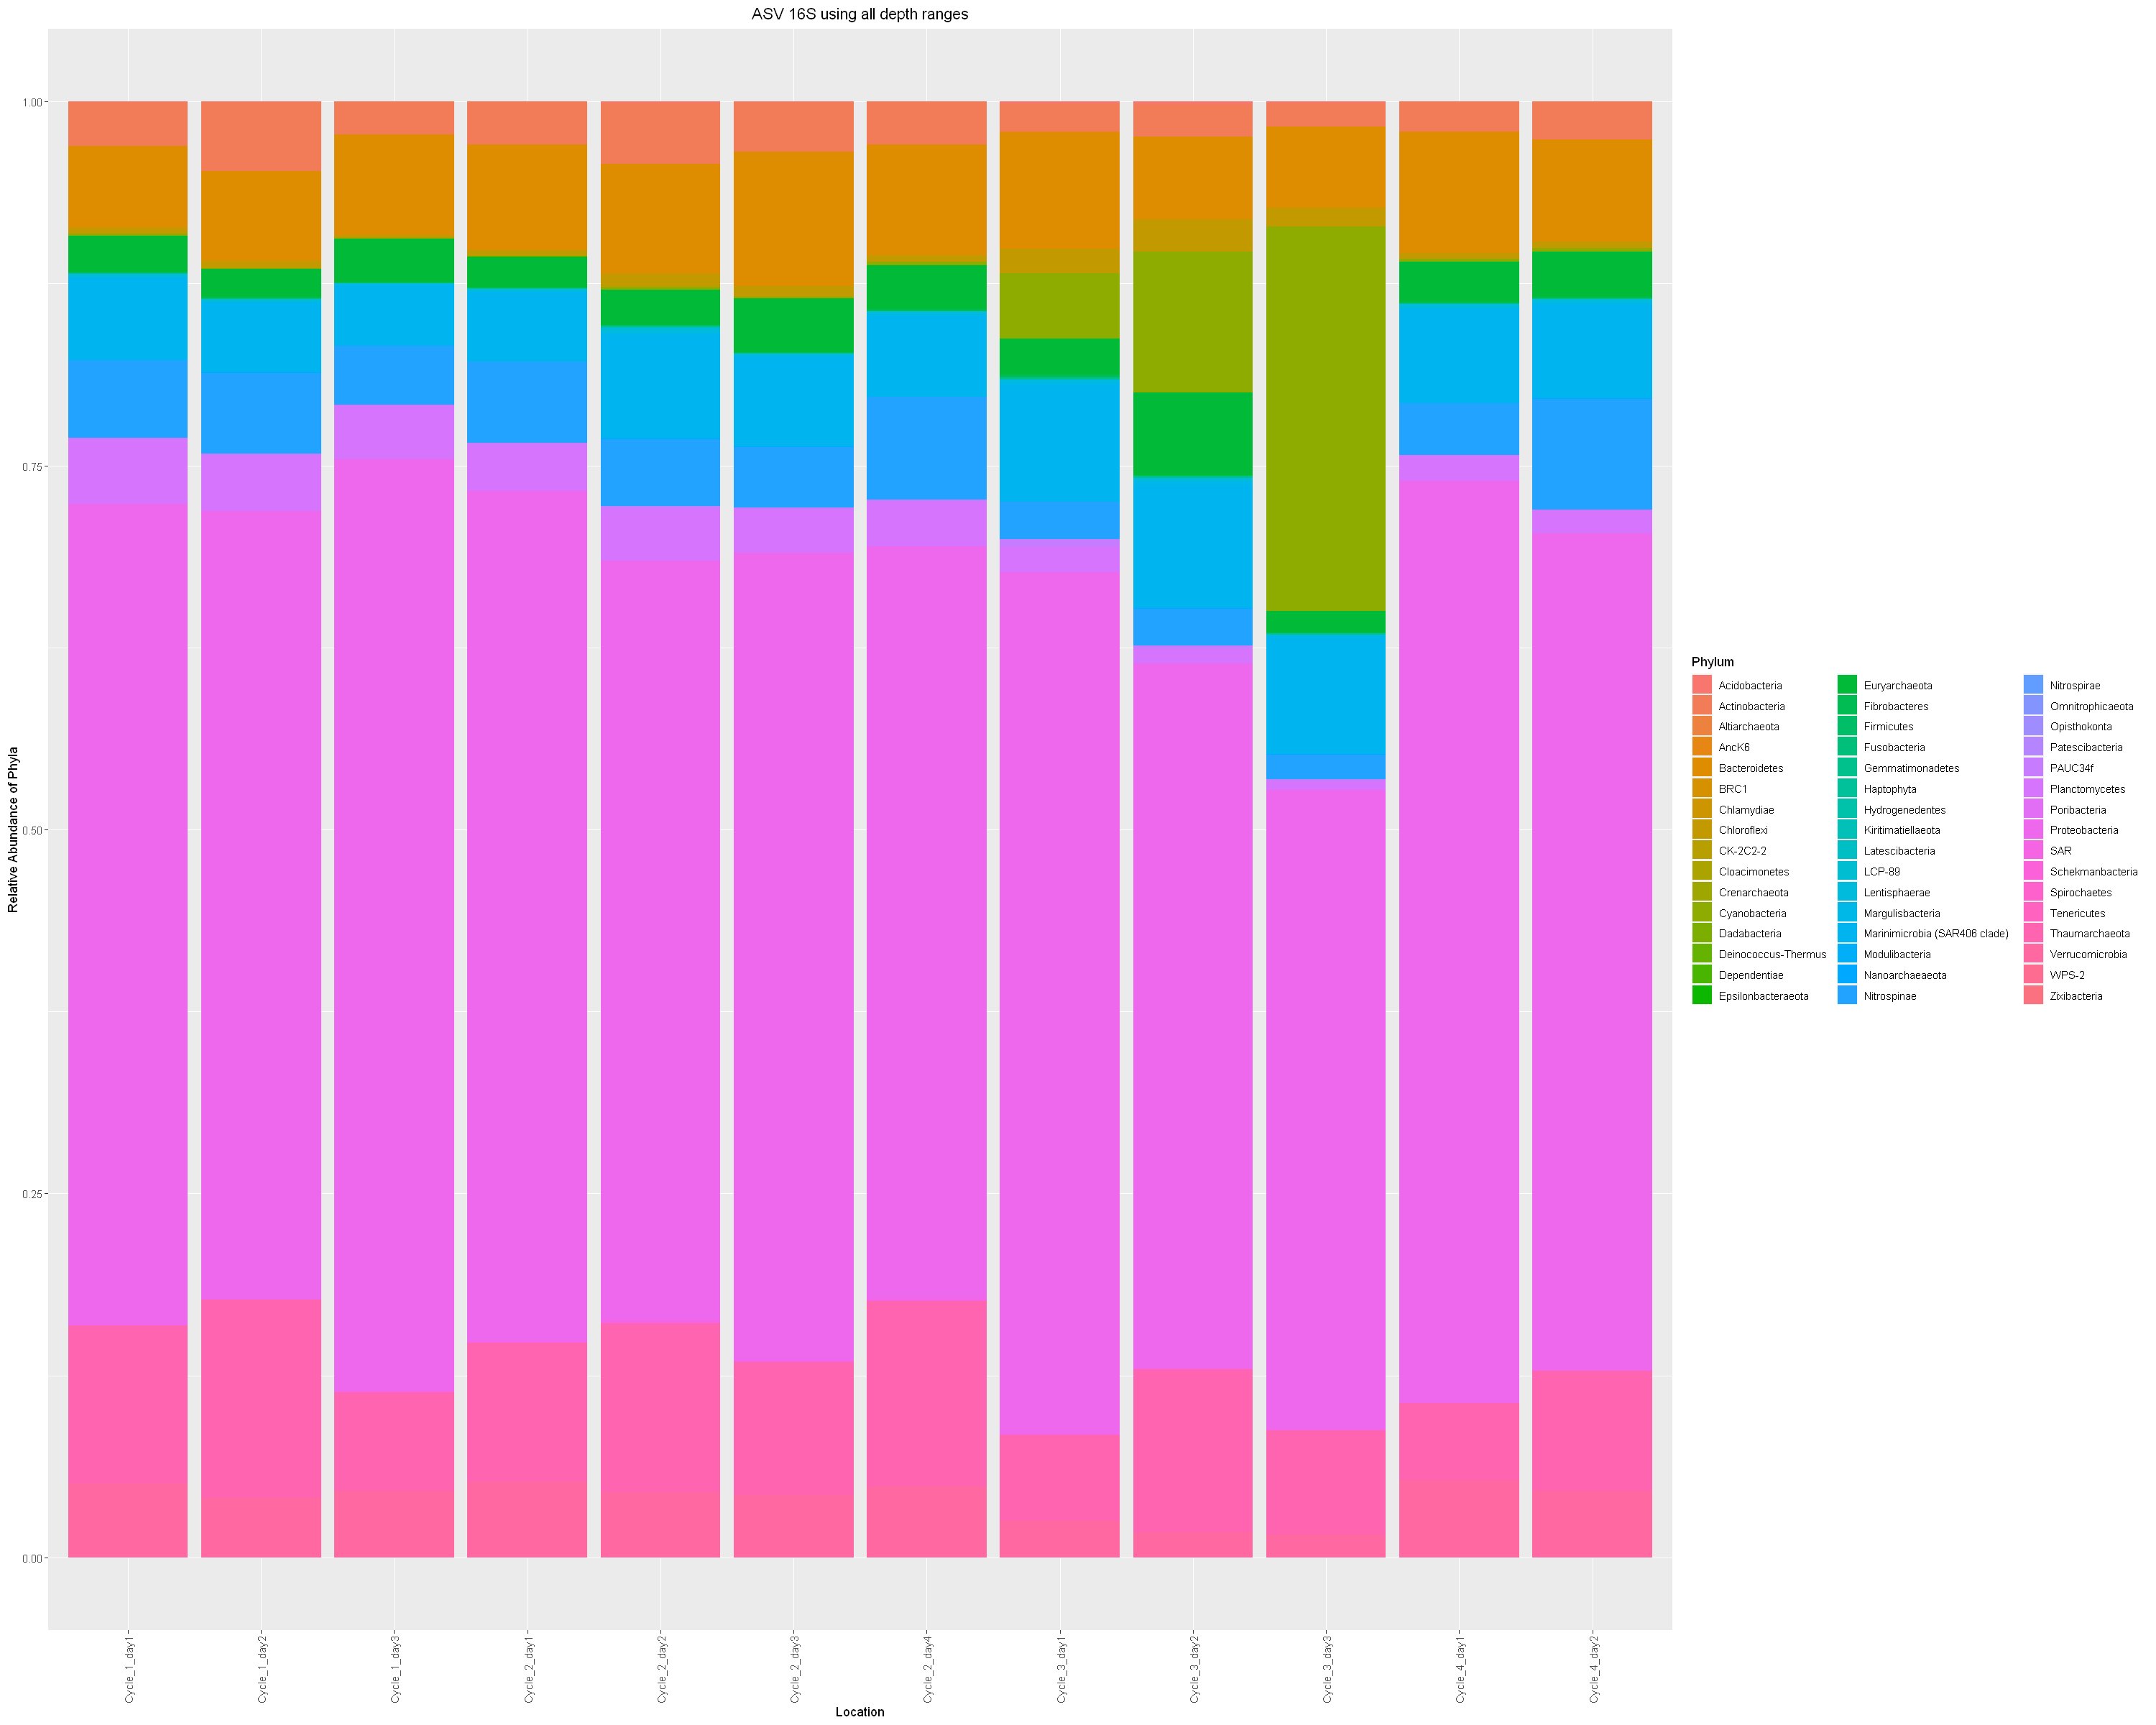

In [261]:
Stacked_plot <- Stacked_plot %>% filter(Group_name != 'NA_values')

stackPlot <- ggplot(Stacked_plot, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity")+ 
  xlab("Location") + 
  ylab("Relative Abundance of Phyla") + 
  labs(fill = "Phylum") + #CHANGE THE TAXONOMIC NAME here
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +   # setting the angle for the x label
  theme(plot.title = element_text(hjust = 0.5)) 

stackPlot + 
ggtitle(label="ASV 16S using all depth ranges") # Provide the title here

Since the colors in the plot above are hard to distinguish, a list of distint colors are generated using: I want hue https://medialab.github.io/iwanthue/

In [263]:
manual_colors <-c("#008333","#ff4985","#00631b","#763595","#4e7300","#c5abff","#ff9c3a",
                 "#006f12","#9554dc","#acd52d","#b22db4","#2ee277","#b90089","#82db6a",
                 "#ff45af","#01bd71","#f7255e","#00cdbd","#b2002b","#01d0ff","#9e2405",
                 "#01a7f5","#d3c400","#4248a5","#cc9700","#8b8eff","#738300","#ff82ea",
                 "#50d6f4","#ff5c56","#00a193","#991a6b","#a1d484","#7a3d6c","#a4d394",
                 "#793f64","#f2bd68","#694e7c","#b16400","#019ba0","#ff898b","#007b62",
                 "#ff9dd2","#405a1f","#a16b91","#7c6400","#acc28c","#665008","#c7cb85","#819a66")

Also, getting the plots for all 3 dataframes: Full, surface, deep:

## A. Stacked bar plot for samples of all depth:

In [278]:
Stacked_plot <- StackPlot_full %>% filter(Group_name != 'NA_values')

stackPlot <- ggplot(Stacked_plot, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  scale_fill_manual(values = manual_colors) +
  scale_y_continuous(labels = scales::label_percent(scale = 100, prefix = "", suffix = ""))+
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")) +
  guides(fill=guide_legend(ncol=2))

In [279]:
stackPlot <- stackPlot + 
    ggtitle(label="ASV 16S using all depth ranges") + #change the name here
    ylab("Relative Abundance of Phyla") + #change name
    labs(fill = "Phylum") #CHANGE THE TAXONOMIC NAME here

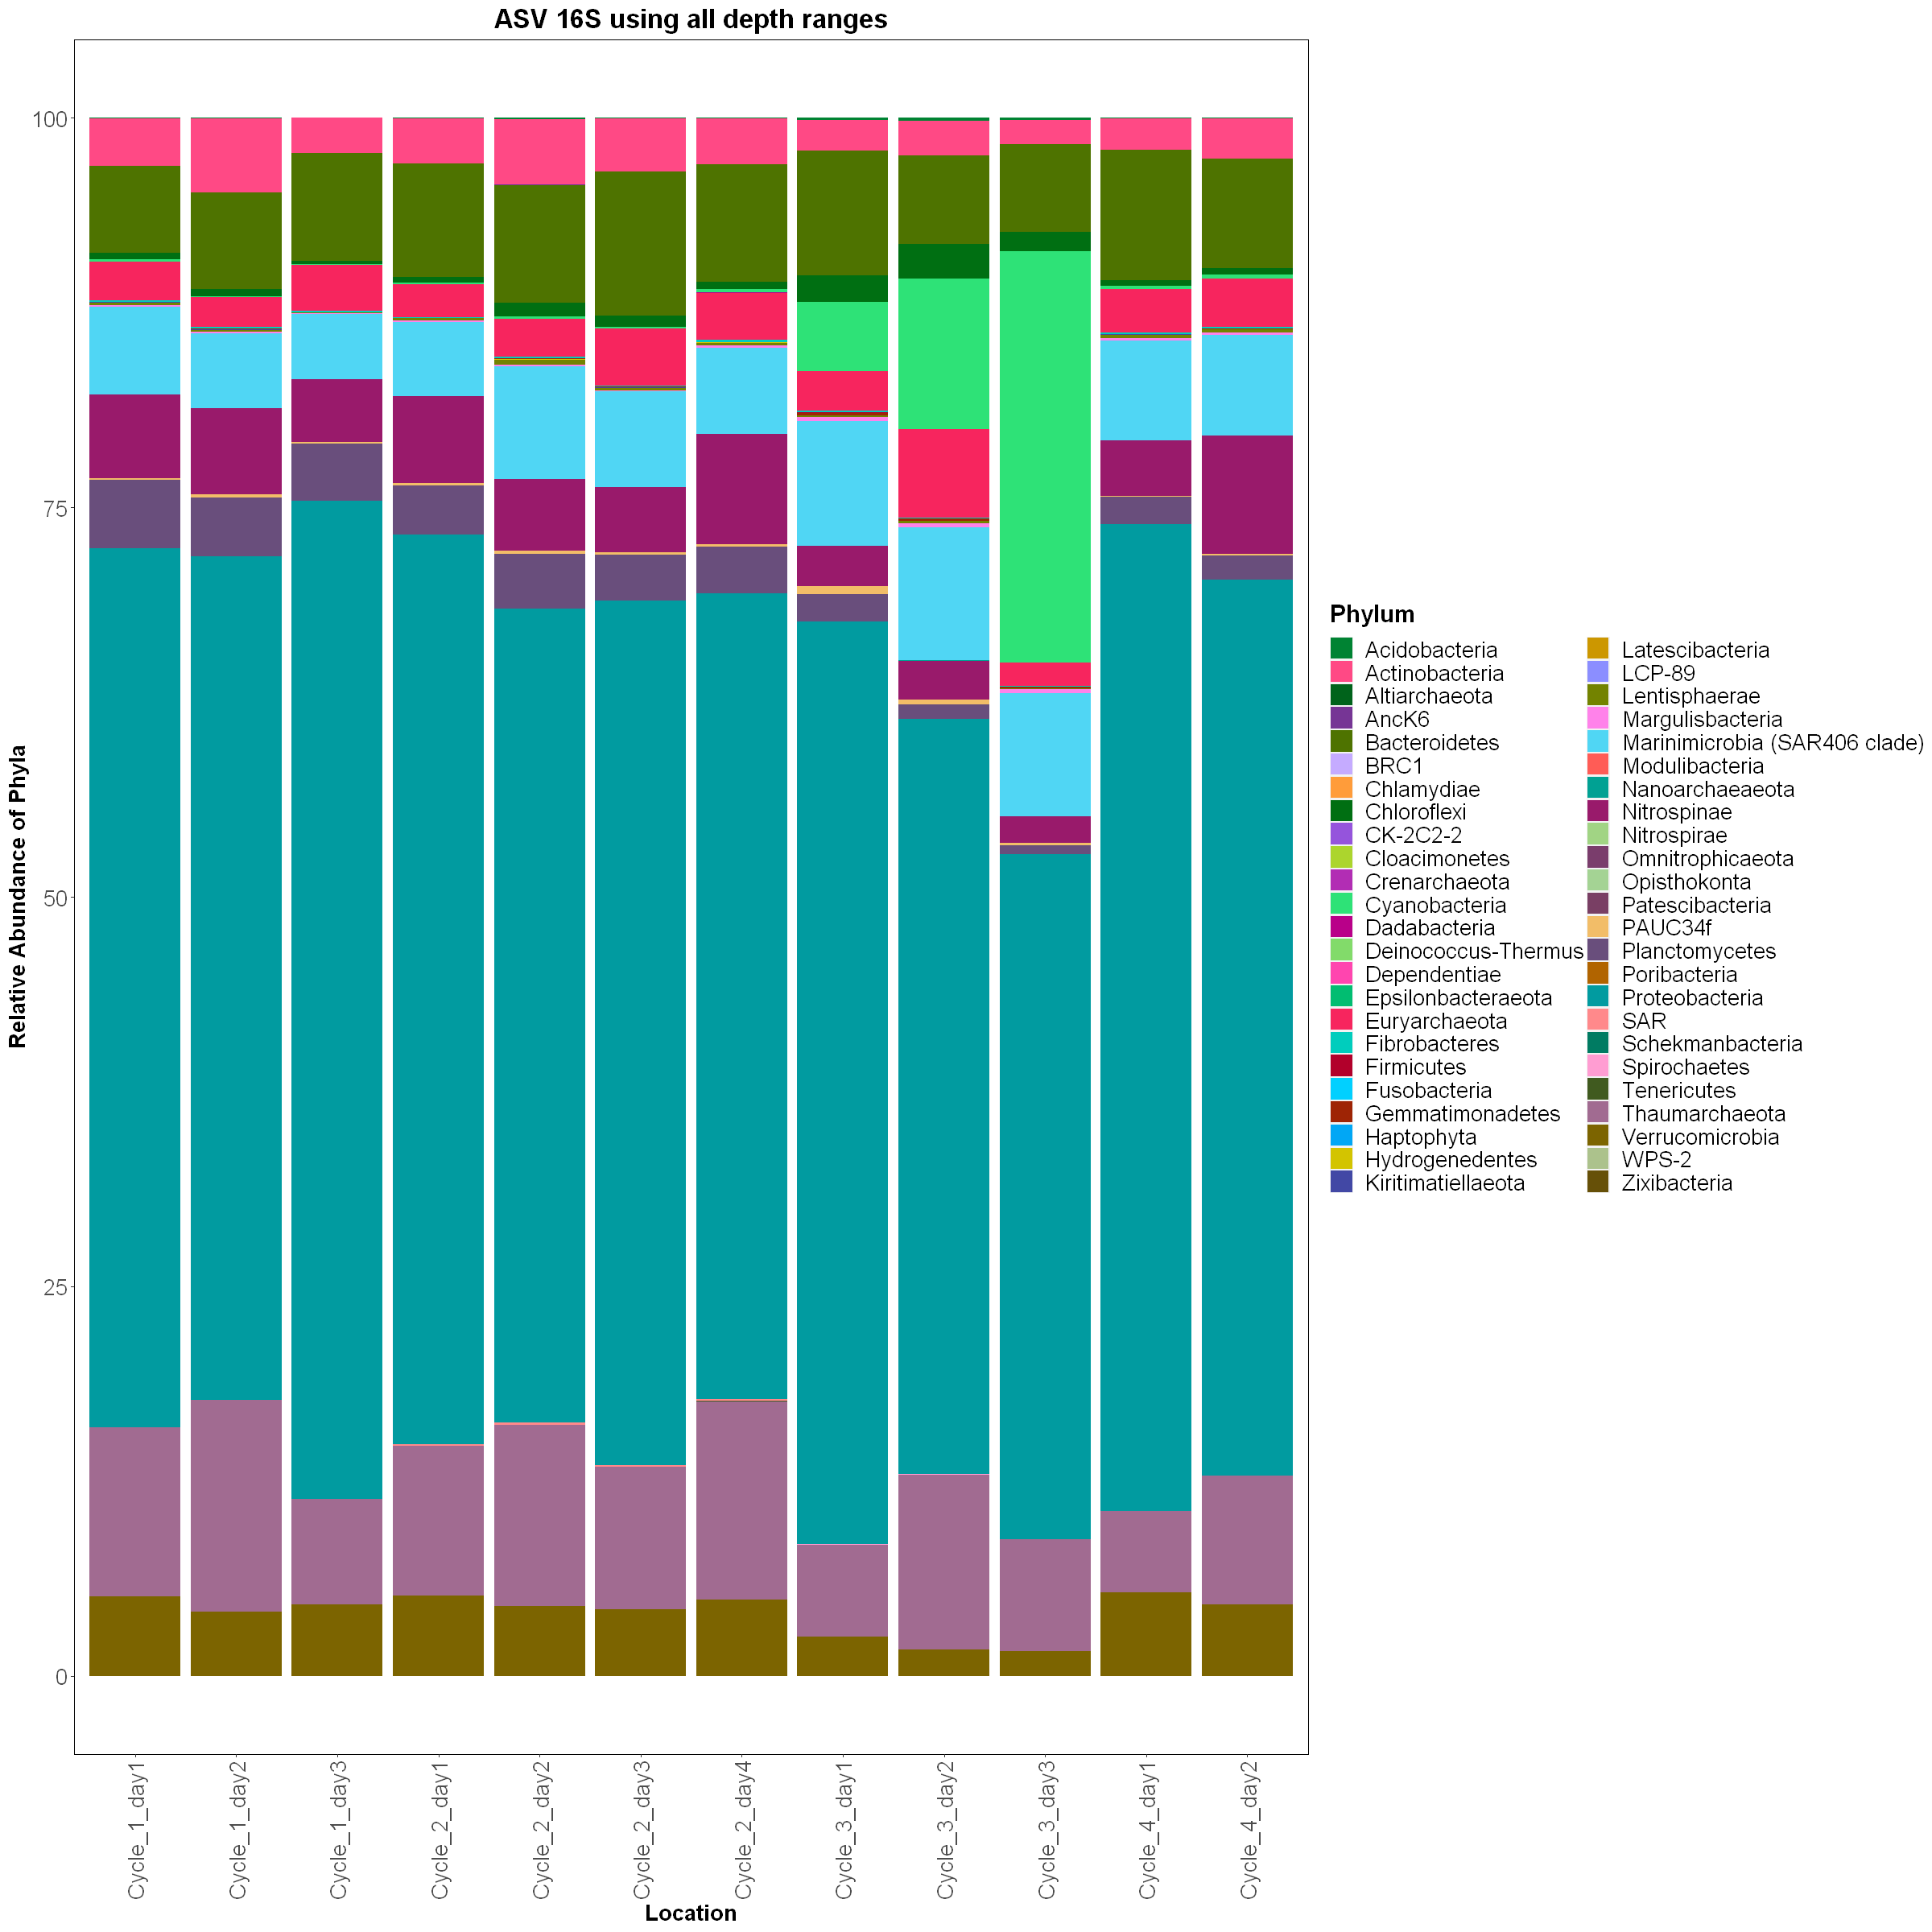

In [280]:
stackPlot # view the plot

In [272]:
ggsave("ASV16S_Phyla_fulldepth.svg",stackPlot) # save the plot

Saving 6.67 x 6.67 in image


## B. Stacked bar plot for surface samples:

In [281]:
Stacked_surface <- StackPlot_surface %>% filter(Group_name != 'NA_values')

stackPlot_surface <- ggplot(Stacked_surface, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  scale_fill_manual(values = manual_colors) +
  scale_y_continuous(labels = scales::label_percent(scale = 100, prefix = "", suffix = ""))+
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")) +
  guides(fill=guide_legend(ncol=2))

<font color="red"> Change the name in the cell below:</font>

In [282]:
stackPlot_surface <- stackPlot_surface + 
    ggtitle(label="ASV 16S using surface samples") + #change the name here
    ylab("Relative Abundance of Phyla") + #cahnge name
    labs(fill = "Phylum") #CHANGE THE TAXONOMIC NAME here

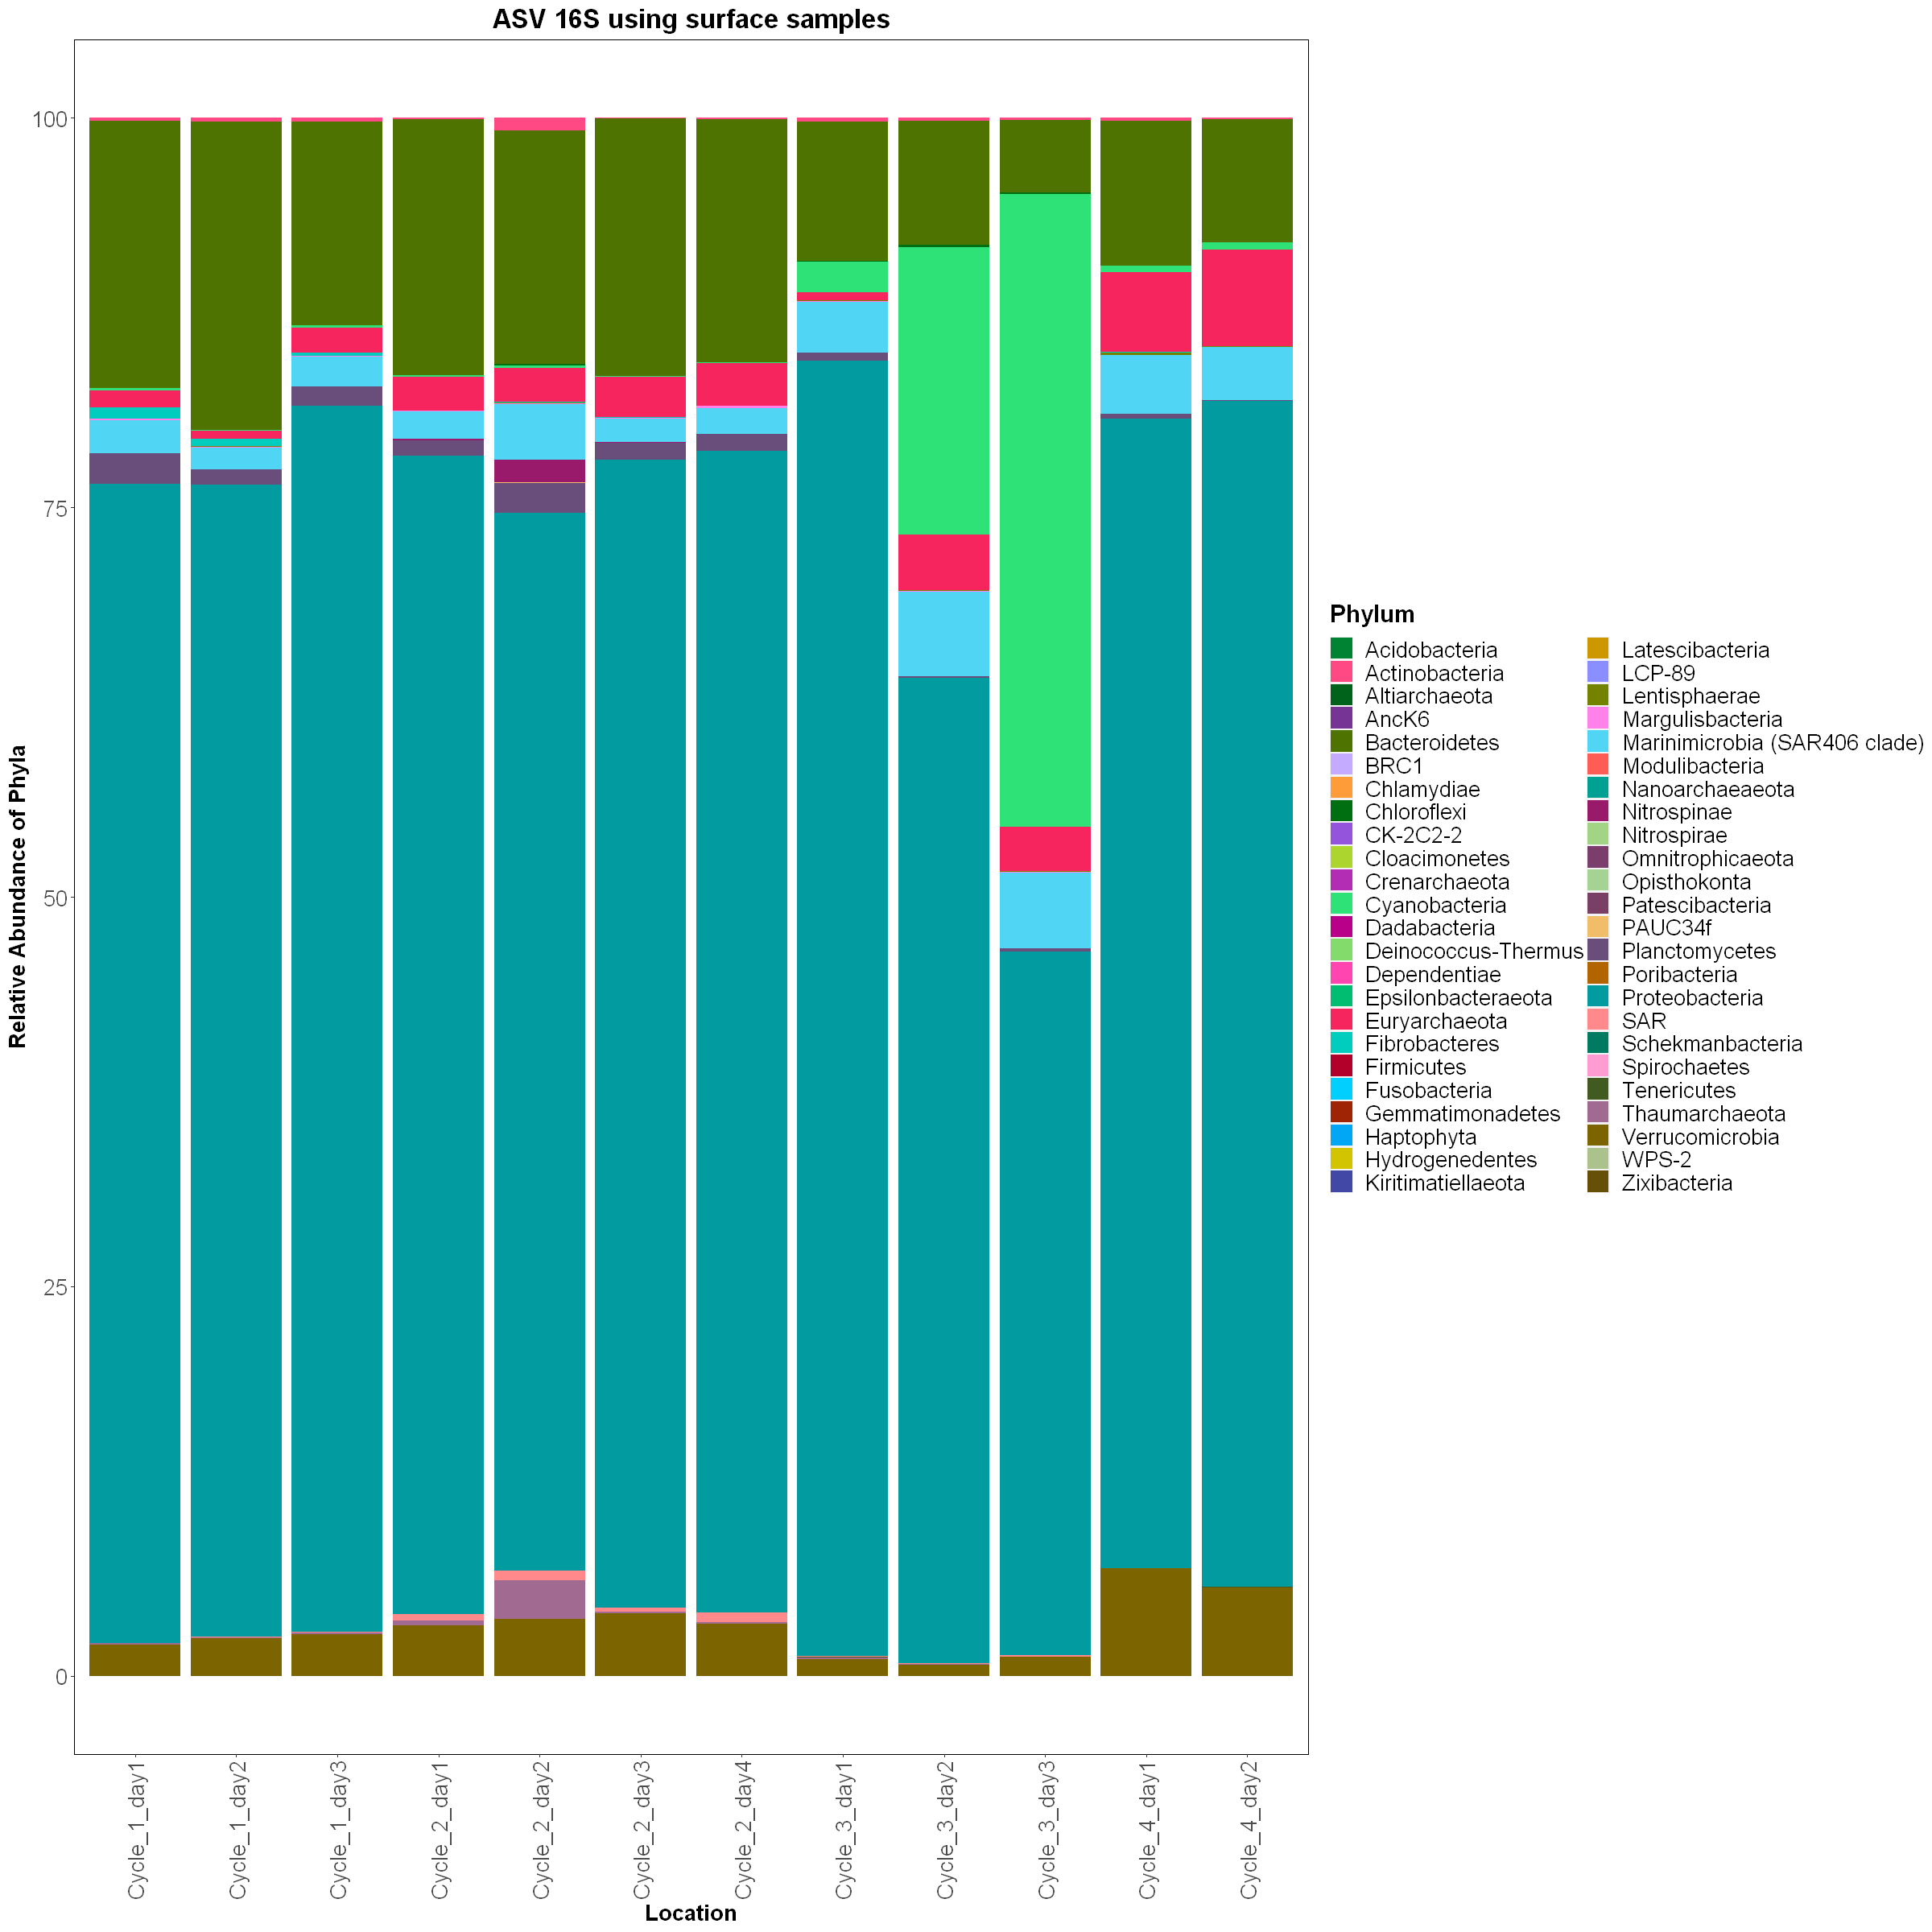

In [283]:
stackPlot_surface # view the plot

In [ ]:
ggsave("ASV16S_Phyla_surface.svg",stackPlot_surface) # save the plot

## C. Stacked bar plot for deep samples:

In [284]:
Stacked_deep <- StackPlot_deep %>% filter(Group_name != 'NA_values')

stackPlot_deep <- ggplot(Stacked_deep, aes(fill=Group_name, y=Percent, x=Condition)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  scale_fill_manual(values = manual_colors) +
  scale_y_continuous(labels = scales::label_percent(scale = 100, prefix = "", suffix = ""))+
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")) +
  guides(fill=guide_legend(ncol=2))

<font color="red"> Change the name in the cell below:</font>

In [285]:
stackPlot_deep <- stackPlot_deep + 
    ggtitle(label="ASV 16S using deep samples") + #change the name here
    ylab("Relative Abundance of Phyla") + #cahnge name
    labs(fill = "Phylum") #CHANGE THE TAXONOMIC NAME here

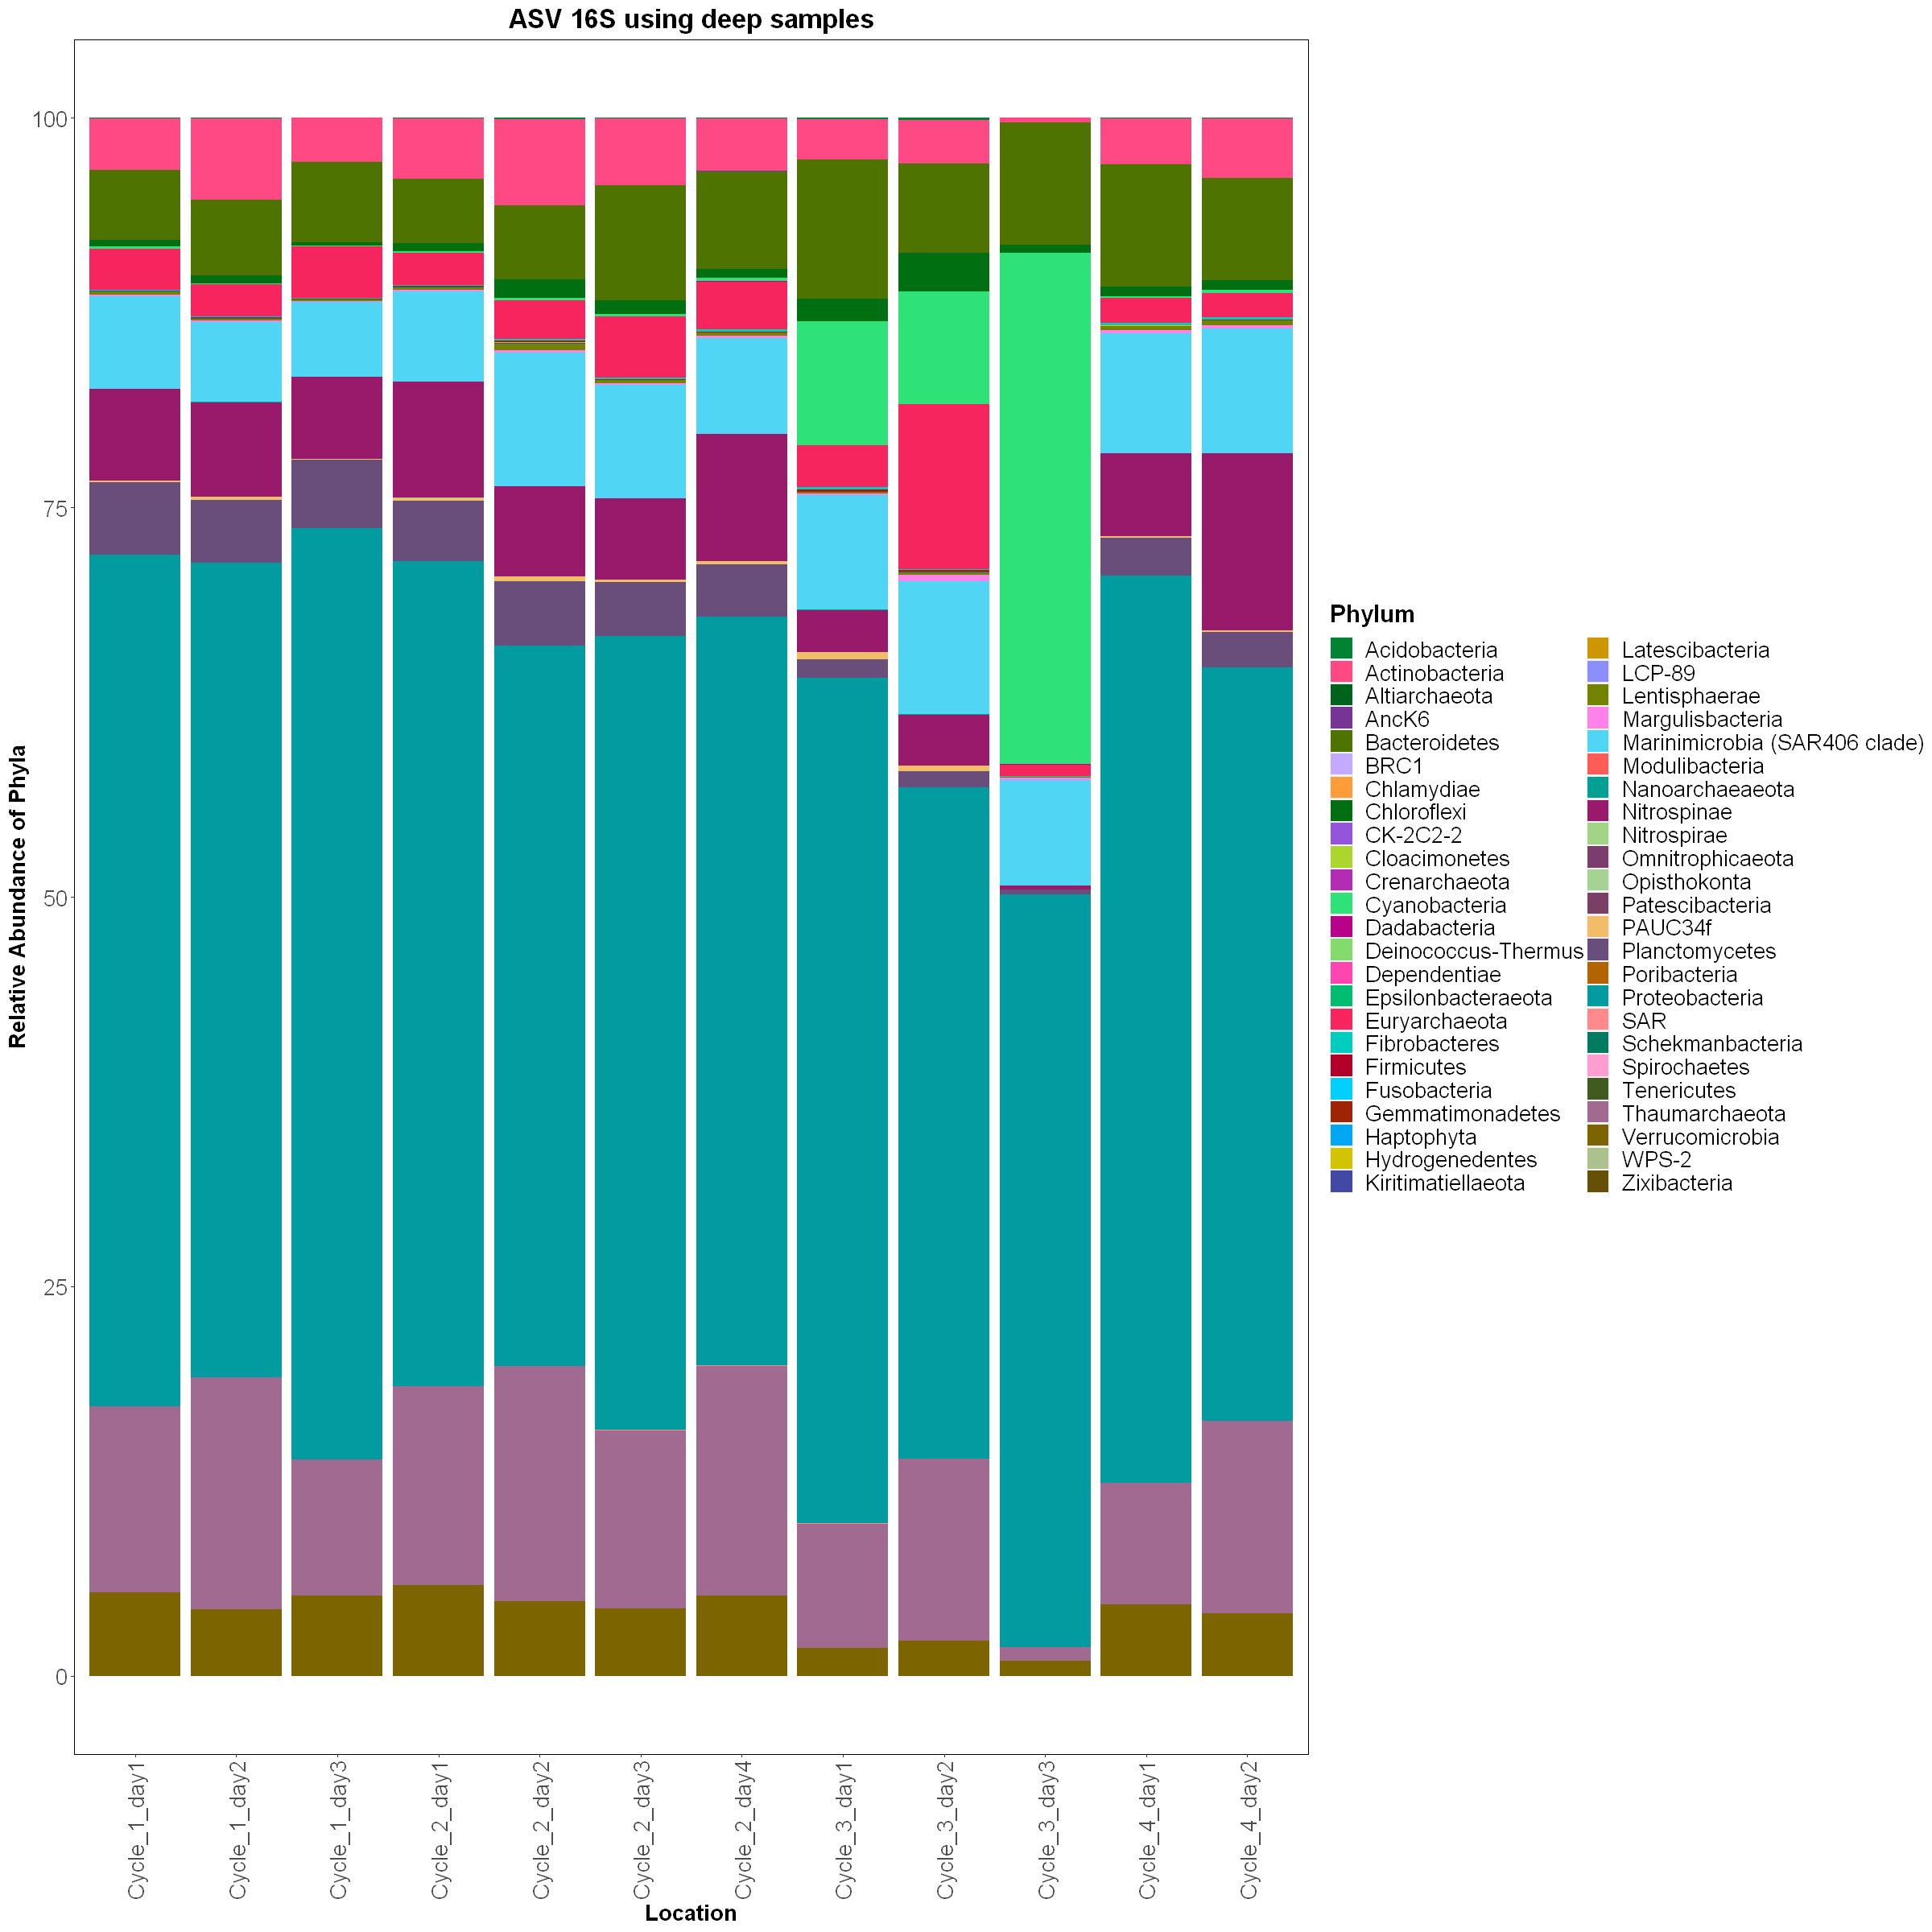

In [286]:
stackPlot_deep # view the plot

In [ ]:
ggsave("ASV16S_Phyla_deep.svg",stackPlot_deep) # save the plot